#Original Author: Jonathan Hudson
#CPSC 501 F22

Imports that are needed

In [23]:
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Determine the arguments

In [24]:
sys.argv = ["", input("Dataset:"), input("Model:")]

In [25]:
def check_args():
     if(len(sys.argv) != 3):
          print("Usage python predict_test.py <MNIST,notMNIST> <model.h5>")
          sys.exit(1)
     if sys.argv[1] == "MNIST":
          print("--Dataset MNIST--")
          class_names = list(range(10))
          mnist = tf.keras.datasets.mnist
          (x_train, y_train), (x_test, y_test) = mnist.load_data()
          x_train, x_test = x_train / 255.0, x_test / 255.0
          data = (x_test, y_test)
     elif sys.argv[1] == "notMNIST":
          print("--Dataset notMNIST--")
          class_names = ["A","B","C","D","E","F","G","H","I","J"]
          with np.load("notMNIST.npz", allow_pickle=True) as f:
            x_train, y_train = f['x_train'], f['y_train']
            x_test, y_test = f['x_test'], f['y_test']
          x_train, x_test = x_train / 255.0, x_test / 255.0
          data = (x_test, y_test)
     else:
          print(f"Choose MNIST or notMNIST, not {sys.argv[1]}")
          sys.exit(2)
     if sys.argv[2][-3:] != ".h5":
          print(f"{sys.argv[2]} is not a h5 extension")
          sys.exit(3)
     return class_names, data

Completed functions to plot for you

In [26]:
def plot(class_names, prediction, true_label, predicted_label, img):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(prediction),class_names[true_label]),color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(class_names, prediction, color="#777777")
    plt.ylim([0, 1])
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Finish this function to predict output from input

--Dataset notMNIST--
--Load Model d.h5--
31
--Should be Class 7--
1/1 [==============================] - 5s 5s/step


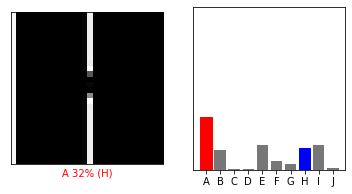

1/1 [==============================] - 0s 197ms/step


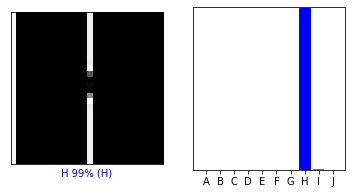

108
--Should be Class 3--
1/1 [==============================] - 0s 19ms/step


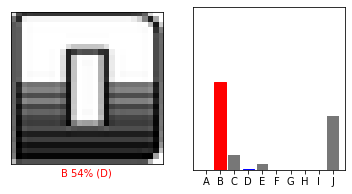

1/1 [==============================] - 0s 20ms/step


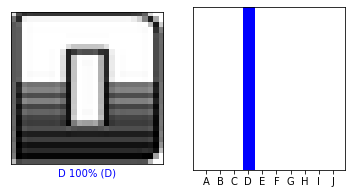

141
--Should be Class 8--
1/1 [==============================] - 0s 20ms/step


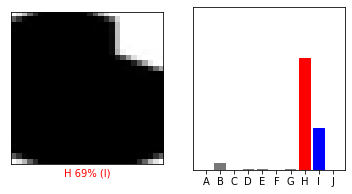

1/1 [==============================] - 0s 21ms/step


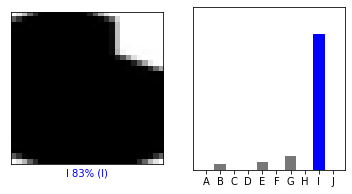

Done


In [37]:
def main():
     class_names, data = check_args()
     x_test, y_test = data
     print(f"--Load Model {sys.argv[2]}--")
     #Load the model that should be in sys.argv[2]
     model1 = tf.keras.models.load_model('notMNIST.h5')
     model2 = tf.keras.models.load_model('notMNIST_complete.h5')          
     pick = input(f"Pick test_image (0 -> {len(x_test)-1}):")
     while pick.isdigit() and int(pick) >= 0 and int(pick) < len(x_test):
    #  for pick in range(0,10000):
        print(pick)
        pick = int(pick)
        img = x_test[pick]
        guess = y_test[pick]
        print(f"--Should be Class {guess}--")
        predict(model1, class_names, img, guess)
        predict(model2, class_names, img, guess)
        pick = input(f"Pick test_image (0 -> {len(x_test)-1}):")
     print("Done")

def predict(model, class_names, img, true_label):
    img = np.array([img])
    #Replace these two lines with code to make a prediction
    # prediction = [1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10]
    prediction = model.predict(img)
    #Determine what the predicted label is
    predicted_label = 0
    # if np.argmax(prediction[0]) != true_label:
    plot(class_names, prediction[0], true_label, predicted_label, img[0])
    plt.show()
main()